In [1]:
import tensorflow as tf
import pymysql as db
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
conn = db.connect(host='192.168.2.88', port=3306, user='zach', passwd='1qaz!QAZ', db='old')

In [3]:
cursor = conn.cursor()

In [4]:
#1734 total visits, 174 unique visitor ids
query_visits = 'SELECT * from old.matomo_log_visit;'

In [5]:
df_ = pd.read_sql_query(query_visits, conn)

In [6]:
pd.options.display.max_columns = len(df_.columns)
pd.options.display.max_rows = len(df_.columns)

In [9]:
df = df_[['idvisit', 'idsite', 'idvisitor', 'user_id', 'visitor_count_visits',
       'visit_total_actions', 'visitor_days_since_last', 'visit_total_time']]

In [13]:
#'visit_total_interactions', 'visit_total_events'

In [51]:
#df_user_count.drop(['idvisitor'], axis=1)

In [52]:
##############################

In [56]:
#looks like different number of idvisitor and user_id.
df_user_session_count = df['idvisitor'].value_counts()

In [57]:
df_user_session_count

b'\xa9J\x8f\xe5\xcc\xb1\x9b\xa6'       277
b'\x11p\xcc\xb8\xc5\xe4\x8f~'          127
b'\xaaw\xd5\xde%\xb1\xf3\xe0'          120
b'\xd7\xe1\x990\xcc\x1fB\xc2'          111
b'3Q\x98\xe9\xaeq\xa2\xd7'              99
b'\xc66=\x85\x18X:\x1a'                 66
b'\xd2\xa6)t\x8d\x98\x01\x8a'           57
b'_\x12\xd6\xcc<O\x0f\xe1'              54
b'2\x00%[%\x82\x85\x9f'                 42
b'\xb2\x0c\x97\x8f\xca\xf7\x9e\xf0'     39
b'\xd1\xfb)l\xdf?.\x17'                 34
b'\x87\xf88\xe8U\x0e\xfe\xc9'           28
b'\n\xb7\xd0w\xc2\x85\xf2\xa1'          26
b'\x08\xbc\xe2\xd9\xa3 k\xf0'           25
b'\xc1\xd6WJ\xdeJ\x04\x8a'              24
b'!\x86\xdc\xd3w;\xe0x'                 23
b'\xca\x10G\x83\xbfm\xa7\xd7'           20
b'\xa2\xdb\x10\xd8\xf5{\xc1\xac'        20
b'rx\x93M\xf2\x82\xee\x10'              18
b'I\xf6\x0f\xff~H\xce\x8a'              18
b'\x05$v\xa2\xd1&\x16\x0f'              16
b'\xafM\x81\xfb31\x91\xfa'              16
b'\xf6\x94\x9a\x8c}[\x90\xb4'           15
b'\xbam\xba

In [ ]:
len(df_user_session_count)

In [ ]:
####################################

In [53]:
df_userid_session_count = df['user_id'].value_counts()

In [61]:
len(df_userid_session_count)

51

In [63]:
df['user_id'].isnull().value_counts()

False    1151
True      583
Name: user_id, dtype: int64

In [67]:
df_userid_none = df[df['user_id'].isnull()]

In [70]:
#users with no user name and the number of sessions they had
df_userid_none['idvisitor'].value_counts()

b'\xd2\xa6)t\x8d\x98\x01\x8a'          57
b'_\x12\xd6\xcc<O\x0f\xe1'             54
b'\xd1\xfb)l\xdf?.\x17'                34
b'\x87\xf88\xe8U\x0e\xfe\xc9'          28
b'\n\xb7\xd0w\xc2\x85\xf2\xa1'         26
b'!\x86\xdc\xd3w;\xe0x'                23
b'\xa2\xdb\x10\xd8\xf5{\xc1\xac'       20
b'\x05$v\xa2\xd1&\x16\x0f'             16
b'\xbam\xba7g\xbd\xee\xd6'             15
b'\xa7\x17\xdd1\xf7\xaeJ\xd3'          14
b';Zk\xe6\x80x\xdd6'                   12
b'U\x96d\x91\x0b;{\n'                  12
b'\xc7\x18\x15\x14\xf1b\x10\xd3'       10
b'\x19\xcc\x87\x7f\xc0\x18\xe9I'        9
b'a\x14Q\xabEp@\xb0'                    9
b'\xc4\x89\xe0m&\x9d$p'                 9
b'\x1d/\x8d\xae\x89M\x02\x81'           7
b'Z\xa8\x9a\x8e\xdd\x80\x8a\x08'        7
b'\xfa&\xc3\x92\xa6\xb5\xf7y'           7
b'\xe3S\xc5K\xb2q\xab\x8a'              7
b'\xf3\x16\x97\xbd\xa8\x01\x0b\xb0'     7
b'\xb5\xd7\x8d\x93\xe8MK6'              7
b'\xd3\x19n\xfb[C^\x87'                 6
b'\xc3O1\x7fi\xa7\xc3\x9e'        

In [49]:
user1_id = df_user_session_count.index[0]

In [50]:
user1_id

b'\xa9J\x8f\xe5\xcc\xb1\x9b\xa6'

In [128]:
df[df['user_id']==user1[1]]

,idvisit,idsite,idvisitor,visit_last_action_time,user_id,visit_first_action_time,visitor_days_since_first,visitor_days_since_order,visitor_returning,visitor_count_visits,visit_entry_idaction_name,visit_entry_idaction_url,visit_exit_idaction_name,visit_exit_idaction_url,visit_total_actions,visit_total_interactions,visit_total_events,visitor_localtime,visitor_days_since_last,visit_total_time
361,362,5,b'\xa9J\x8f\xe5\xcc\xb1\x9b\xa6',2018-05-24 14:28:47,test,2018-05-24 14:27:12,0,0,0,1,22,23.0,22,23,16,5,11,19:56:45,0,96
367,368,5,b'\xa9J\x8f\xe5\xcc\xb1\x9b\xa6',2018-05-25 07:57:59,test,2018-05-25 07:55:56,0,0,0,1,22,23.0,30,31,7,2,5,13:25:27,0,124
370,371,5,b'\xa9J\x8f\xe5\xcc\xb1\x9b\xa6',2018-05-25 09:08:16,test,2018-05-25 09:06:09,0,0,0,1,22,23.0,38,39,23,4,19,14:35:40,0,128
372,373,5,b'\xa9J\x8f\xe5\xcc\xb1\x9b\xa6',2018-05-25 09:22:33,test,2018-05-25 09:22:33,0,0,0,1,22,23.0,22,23,1,1,0,14:52:05,0,0
373,374,8,b'\xa9J\x8f\xe5\xcc\xb1\x9b\xa6',2018-05-25 12:38:30,test,2018-05-25 12:38:30,0,0,0,1,22,96.0,22,96,1,1,0,18:08:03,0,0
374,375,8,b'\xa9J\x8f\xe5\xcc\xb1\x9b\xa6',2018-05-25 12:52:03,test,2018-05-25 12:40:28,0,0,0,1,22,96.0,97,98,3,2,1,18:09:59,0,696
390,391,4,b'\xa9J\x8f\xe5\xcc\xb1\x9b\xa6',2018-05-28 06:32:00,test,2018-05-28 06:30:54,0,0,0,1,22,51.0,22,51,5,4,1,12:00:24,0,67
394,395,5,b'\xa9J\x8f\xe5\xcc\xb1\x9b\xa6',2018-05-28 10:52:40,test,2018-05-28 10:51:05,0,0,0,1,22,23.0,22,23,13,3,10,16:20:35,0,96
446,447,8,b'\xa9J\x8f\xe5\xcc\xb1\x9b\xa6',2018-06-01 10:19:17,test,2018-06-01 10:18:46,7,0,1,2,22,96.0,97,98,4,4,0,15:48:20,7,32
486,487,5,b'\xa9J\x8f\xe5\xcc\xb1\x9b\xa6',2018-06-06 06:57:49,test,2018-06-06 06:57:49,0,0,0,1,22,23.0,30,31,2,2,0,12:27:21,0,1


In [129]:
df_user = df[df['idvisitor'] == user1[0]]

In [130]:
df_user

,idvisit,idsite,idvisitor,visit_last_action_time,user_id,visit_first_action_time,visitor_days_since_first,visitor_days_since_order,visitor_returning,visitor_count_visits,visit_entry_idaction_name,visit_entry_idaction_url,visit_exit_idaction_name,visit_exit_idaction_url,visit_total_actions,visit_total_interactions,visit_total_events,visitor_localtime,visitor_days_since_last,visit_total_time
361,362,5,b'\xa9J\x8f\xe5\xcc\xb1\x9b\xa6',2018-05-24 14:28:47,test,2018-05-24 14:27:12,0,0,0,1,22,23.0,22,23,16,5,11,19:56:45,0,96
367,368,5,b'\xa9J\x8f\xe5\xcc\xb1\x9b\xa6',2018-05-25 07:57:59,test,2018-05-25 07:55:56,0,0,0,1,22,23.0,30,31,7,2,5,13:25:27,0,124
370,371,5,b'\xa9J\x8f\xe5\xcc\xb1\x9b\xa6',2018-05-25 09:08:16,test,2018-05-25 09:06:09,0,0,0,1,22,23.0,38,39,23,4,19,14:35:40,0,128
372,373,5,b'\xa9J\x8f\xe5\xcc\xb1\x9b\xa6',2018-05-25 09:22:33,test,2018-05-25 09:22:33,0,0,0,1,22,23.0,22,23,1,1,0,14:52:05,0,0
373,374,8,b'\xa9J\x8f\xe5\xcc\xb1\x9b\xa6',2018-05-25 12:38:30,test,2018-05-25 12:38:30,0,0,0,1,22,96.0,22,96,1,1,0,18:08:03,0,0
374,375,8,b'\xa9J\x8f\xe5\xcc\xb1\x9b\xa6',2018-05-25 12:52:03,test,2018-05-25 12:40:28,0,0,0,1,22,96.0,97,98,3,2,1,18:09:59,0,696
390,391,4,b'\xa9J\x8f\xe5\xcc\xb1\x9b\xa6',2018-05-28 06:32:00,test,2018-05-28 06:30:54,0,0,0,1,22,51.0,22,51,5,4,1,12:00:24,0,67
394,395,5,b'\xa9J\x8f\xe5\xcc\xb1\x9b\xa6',2018-05-28 10:52:40,test,2018-05-28 10:51:05,0,0,0,1,22,23.0,22,23,13,3,10,16:20:35,0,96
446,447,8,b'\xa9J\x8f\xe5\xcc\xb1\x9b\xa6',2018-06-01 10:19:17,test,2018-06-01 10:18:46,7,0,1,2,22,96.0,97,98,4,4,0,15:48:20,7,32
486,487,5,b'\xa9J\x8f\xe5\xcc\xb1\x9b\xa6',2018-06-06 06:57:49,test,2018-06-06 06:57:49,0,0,0,1,22,23.0,30,31,2,2,0,12:27:21,0,1


In [131]:
x = df_user['visit_first_action_time']

In [132]:
y = df_user['visit_total_time']

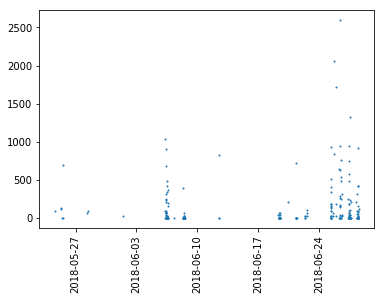

In [133]:
fig = plt.figure()
ax = fig.add_subplot(111) #row-col-num
ax.plot(x,y,ls='None', marker='o', markersize=1)
plt.axis('tight')
plt.xticks(rotation='vertical')

plt.show()

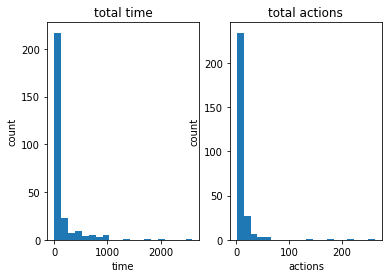

In [134]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.hist(df_user['visit_total_time'], bins=20)
ax1.set_title('total time')
ax1.set_xlabel('time')
ax1.set_ylabel('count')

ax2.hist(df_user['visit_total_actions'], bins=20)
ax2.set_title('total actions')
ax2.set_xlabel('actions')
ax2.set_ylabel('count')

plt.show()

/home/zachclem/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


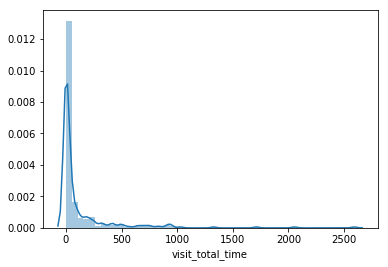

In [135]:
sns.distplot(df_user['visit_total_time'])

In [141]:
df_most_actions = df.sort_values(by='visit_total_actions', ascending = False)
df_most_actions

,idvisit,idsite,idvisitor,visit_last_action_time,user_id,visit_first_action_time,visitor_days_since_first,visitor_days_since_order,visitor_returning,visitor_count_visits,visit_entry_idaction_name,visit_entry_idaction_url,visit_exit_idaction_name,visit_exit_idaction_url,visit_total_actions,visit_total_interactions,visit_total_events,visitor_localtime,visitor_days_since_last,visit_total_time
1537,1538,5,b'\xb4D\xac\x06a?\xc8\xd6',2018-06-25 19:21:26,test1,2018-06-25 18:22:35,0,0,1,2,22,23.0,22,23,1141,24,1117,14:22:09,0,3532
1558,1559,5,b'\xc66=\x85\x18X:\x1a',2018-06-26 07:18:46,bdxfv,2018-06-26 07:01:19,7,0,1,98,22,23.0,30,31,395,2,393,12:30:49,1,1048
1687,1688,5,b'\xd7\xe1\x990\xcc\x1fB\xc2',2018-06-27 18:19:13,sean,2018-06-27 17:45:35,14,0,1,29,22,23.0,41,42,347,8,339,13:45:08,0,2019
1588,1589,5,b'\xb4D\xac\x06a?\xc8\xd6',2018-06-26 14:36:31,test1,2018-06-26 14:25:57,1,0,1,3,22,23.0,30,31,334,12,322,10:25:30,1,635
1383,1384,4,b'\xd7\xe1\x990\xcc\x1fB\xc2',2018-06-22 19:25:47,sean,2018-06-22 19:11:46,9,0,1,30,22,51.0,22,51,272,14,258,15:11:16,1,842
1549,1550,4,b'\xa9J\x8f\xe5\xcc\xb1\x9b\xa6',2018-06-25 21:41:34,test,2018-06-25 21:13:03,0,0,0,1,22,51.0,22,51,263,9,254,17:12:33,0,1712
1559,1560,5,b'\xa9J\x8f\xe5\xcc\xb1\x9b\xa6',2018-06-26 07:33:15,test,2018-06-26 07:22:30,0,0,0,1,22,23.0,38,39,214,6,208,12:52:02,0,646
1532,1533,5,b'\xa9J\x8f\xe5\xcc\xb1\x9b\xa6',2018-06-25 18:21:46,test,2018-06-25 17:47:33,0,0,0,1,22,23.0,22,23,172,31,141,13:47:06,0,2054
1730,1731,5,b'\xaaw\xd5\xde%\xb1\xf3\xe0',2018-06-28 12:25:31,tesat,2018-06-28 12:18:03,9,0,1,145,22,23.0,30,31,167,14,153,17:47:34,0,449
1541,1542,7,b'\xb3\xfdU\xb3\xf1\x88:\xd3',2018-06-25 20:51:25,kien,2018-06-25 20:15:34,0,0,1,3,22,130.0,22,130,164,21,143,16:15:08,0,2152


In [142]:
df_most_actions.iloc[0, :]

idvisit                                            1538
idsite                                                5
idvisitor                    b'\xb4D\xac\x06a?\xc8\xd6'
visit_last_action_time              2018-06-25 19:21:26
user_id                                           test1
visit_first_action_time             2018-06-25 18:22:35
visitor_days_since_first                              0
visitor_days_since_order                              0
visitor_returning                                     1
visitor_count_visits                                  2
visit_entry_idaction_name                            22
visit_entry_idaction_url                             23
visit_exit_idaction_name                             22
visit_exit_idaction_url                              23
visit_total_actions                                1141
visit_total_interactions                             24
visit_total_events                                 1117
visitor_localtime                       0 days 1

In [139]:
df.groupby(['idsite']).agg({'idsite': 'count'})

,idsite
idsite,
1,581
4,249
5,826
6,13
7,45
8,20


In [144]:
#visit_total_time is in seconds. Divide by 60 to get total time in minutes
df_most_actions.iloc[0, :]['visit_total_time']/60

58.866666666666667